In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools
import sklearn

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [24]:
# Loading a data set
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', sep = ';')
df = df.drop(['duration'], axis=1)
df.shape

(41188, 20)

In [18]:
le = LabelEncoder()
df["y"] = le.fit_transform(df["y"])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [19]:
# replace unknown to NAN
df = df.replace('unknown', np.nan)
#drop the row which contain the missing data
df = df.dropna()
#reset the index
df = df.reset_index(drop = True)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [20]:
# Apply one-hot encoding to convert categorical features to integer
cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
df_dummies = pd.get_dummies(df)

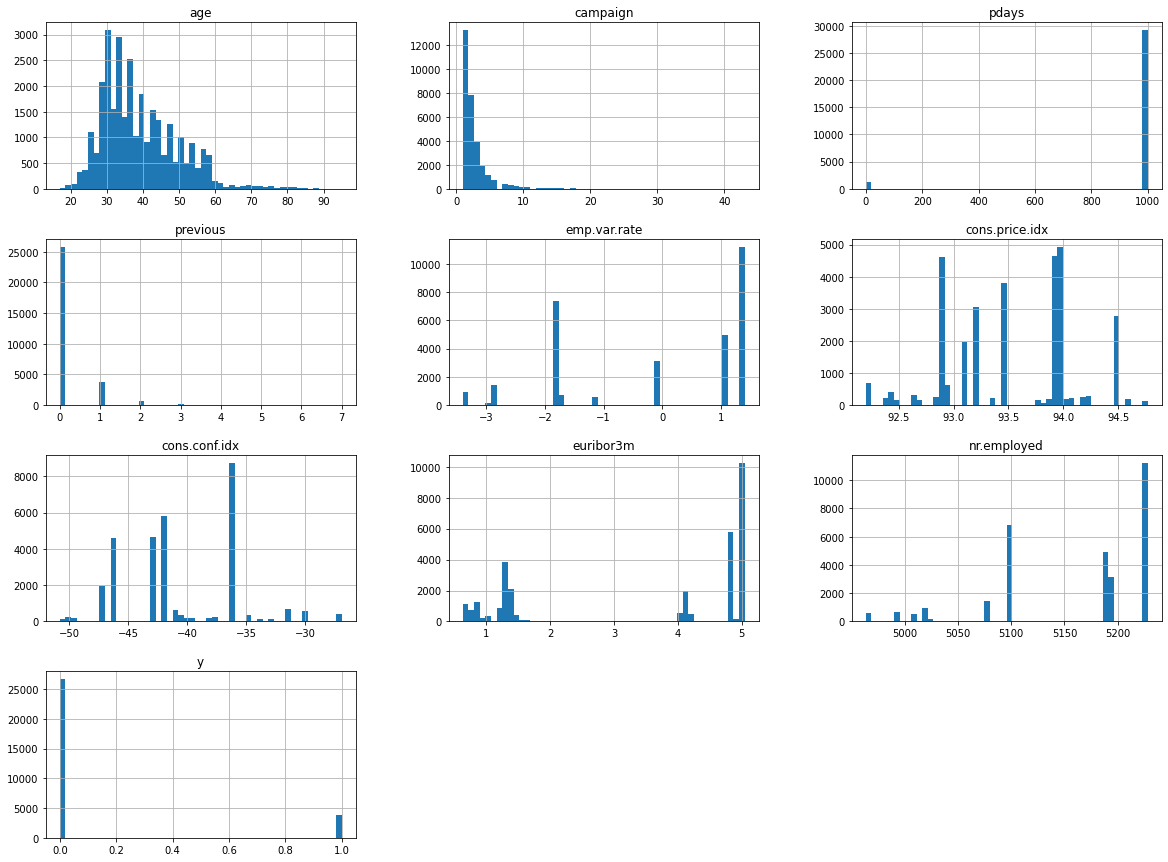

In [21]:
# Plot histograms
_ = df.hist(bins=50, figsize=(20,15))

In [26]:
# Standardise the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_dummies)

# moving the output colomn to the first
first_column = df_dummies.pop('y')
df_dummies.insert(0, 'y', first_column)

# split the dataset to training and testing set
x = df_dummies.iloc[:, 1:].values
y = df_dummies.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=50, stratify = y)

In [38]:
clf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=60)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=60)

In [39]:
y_pred = clf.predict(x_test)
scores = cross_val_score(clf, x_train, y_train, scoring = make_scorer(f1_score))
print(np.mean(scores))

0.3706047638260911


In [37]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train, y_train)
dummy_y_pred = dummy_clf.predict(x_test)
scores = cross_val_score(dummy_clf, x_train, y_train, scoring = make_scorer(f1_score))
print(np.mean(scores))

0.13096585611347322


In [40]:
# Let's see the feature importances for our classifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Let's get the attibute names
feature_names = df_dummies.columns
feature_names = feature_names.drop('y')
feature_names = feature_names.insert(0,'y')

# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]],  importances[indices[f]]))


[ 7  8 55  0  2  6  5  4  1  3 36 46 53 43 54 37 49 29 33 32 21 51 44 50
  9 22 26 52 48 38 34 28 14 35 18 10 25 20 17 13 23 42 47 16 15 24 19 39
 12 45 41 11 40 27 31 30]
Feature ranking:
1. cons.conf.idx (0.161062)
2. euribor3m (0.104949)
3. poutcome_nonexistent (0.066925)
4. y (0.064364)
5. campaign (0.064246)
6. cons.price.idx (0.060965)
7. emp.var.rate (0.049379)
8. previous (0.047951)
9. age (0.032766)
10. pdays (0.023710)
11. loan_yes (0.014494)
12. month_nov (0.014343)
13. day_of_week_wed (0.013735)
14. month_jun (0.013223)
15. poutcome_failure (0.013182)
16. contact_cellular (0.013088)
17. day_of_week_fri (0.012368)
18. education_professional.course (0.010289)
19. housing_no (0.010249)
20. default_yes (0.009989)
21. marital_divorced (0.009309)
22. day_of_week_thu (0.009041)
23. month_mar (0.008755)
24. day_of_week_mon (0.008718)
25. nr.employed (0.008620)
26. marital_married (0.008427)
27. education_basic.9y (0.008366)
28. day_of_week_tue (0.008347)
29. month_sep (0.008172)
30

In [52]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [100, 200], "max_depth":[1,5,10,20] , "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], "class_weight":["balanced","balanced_subsample"]}]
scores = ["precision", "recall"]

for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()

  clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring="%s_macro" % score)
  clf.fit(x_train, y_train)

  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_["mean_test_score"]
  stds = clf.cv_results_["std_test_score"]
  for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
      print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
  print()

  print("Detailed classification report:")
  print()
  print("The model is trained on the full development set.")
  print("The scores are computed on the full evaluation set.")
  print()
  y_true, y_pred = y_test, clf.predict(x_test)
  print(classification_report(y_true, y_pred))
  print("Accuracy:",accuracy_score(y_test, y_pred))
  print("Precision:",precision_score(y_test, y_pred))
  print("Recall:",recall_score(y_test, y_pred))
  print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}

Grid scores on development set:

0.630 (+/-0.031) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100}
0.617 (+/-0.028) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 200}
0.625 (+/-0.043) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100}
0.624 (+/-0.034) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 200}
0.628 (+/-0.035) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 100}
0.618 (+/-0.035) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'max_feat

KeyboardInterrupt: 

In [60]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, criterion = 'gini', max_features = 'auto', class_weight = 'balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1_score(y_test, y_pred)

0.4856470588235293

In [61]:
import pickle as pkl

outp = open('model.pkl', 'wb')
pkl.dump(clf, outp, -1)  # where clf is your classifier
outp.close()

In [48]:
np.savetxt("testset.csv", y_test, delimiter=",")